# IMPORT LIBRARY

In [1100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# DATA OVERVIEW

In [1101]:
df = pd.read_csv('Clicked Ads Dataset.csv', index_col=0)
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Timestamp,Clicked on Ad,city,province,category
0,68.95,35,432837300.0,256.09,Perempuan,3/27/2016 0:53,No,Jakarta Timur,Daerah Khusus Ibukota Jakarta,Furniture
1,80.23,31,479092950.0,193.77,Laki-Laki,4/4/2016 1:39,No,Denpasar,Bali,Food
2,69.47,26,418501580.0,236.50,Perempuan,3/13/2016 20:35,No,Surabaya,Jawa Timur,Electronic
3,74.15,29,383643260.0,245.89,Laki-Laki,1/10/2016 2:31,No,Batam,Kepulauan Riau,House
4,68.37,35,517229930.0,225.58,Perempuan,6/3/2016 3:36,No,Medan,Sumatra Utara,Finance


In [1102]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Daily Time Spent on Site,987.0,6.492952e+01,1.584470e+01,32.60,5.127000e+01,6.811000e+01,7.846000e+01,9.143000e+01
Age,1000.0,3.600900e+01,8.785562e+00,19.00,2.900000e+01,3.500000e+01,4.200000e+01,6.100000e+01
Area Income,987.0,3.848647e+08,9.407999e+07,97975500.00,3.286330e+08,3.990683e+08,4.583554e+08,5.563936e+08
Daily Internet Usage,989.0,1.798636e+02,4.387014e+01,104.78,1.387100e+02,1.826500e+02,2.187900e+02,2.670100e+02


In [1103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  987 non-null    float64
 1   Age                       1000 non-null   int64  
 2   Area Income               987 non-null    float64
 3   Daily Internet Usage      989 non-null    float64
 4   Male                      997 non-null    object 
 5   Timestamp                 1000 non-null   object 
 6   Clicked on Ad             1000 non-null   object 
 7   city                      1000 non-null   object 
 8   province                  1000 non-null   object 
 9   category                  1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 85.9+ KB


In [1104]:
df['Timestamp'] = pd.to_datetime(df['Timestamp']) #merubah tipe data menjadi date

# EXPLORATORY DATA ANALYSIS (EDA)

## Univariate Analysis

### Age

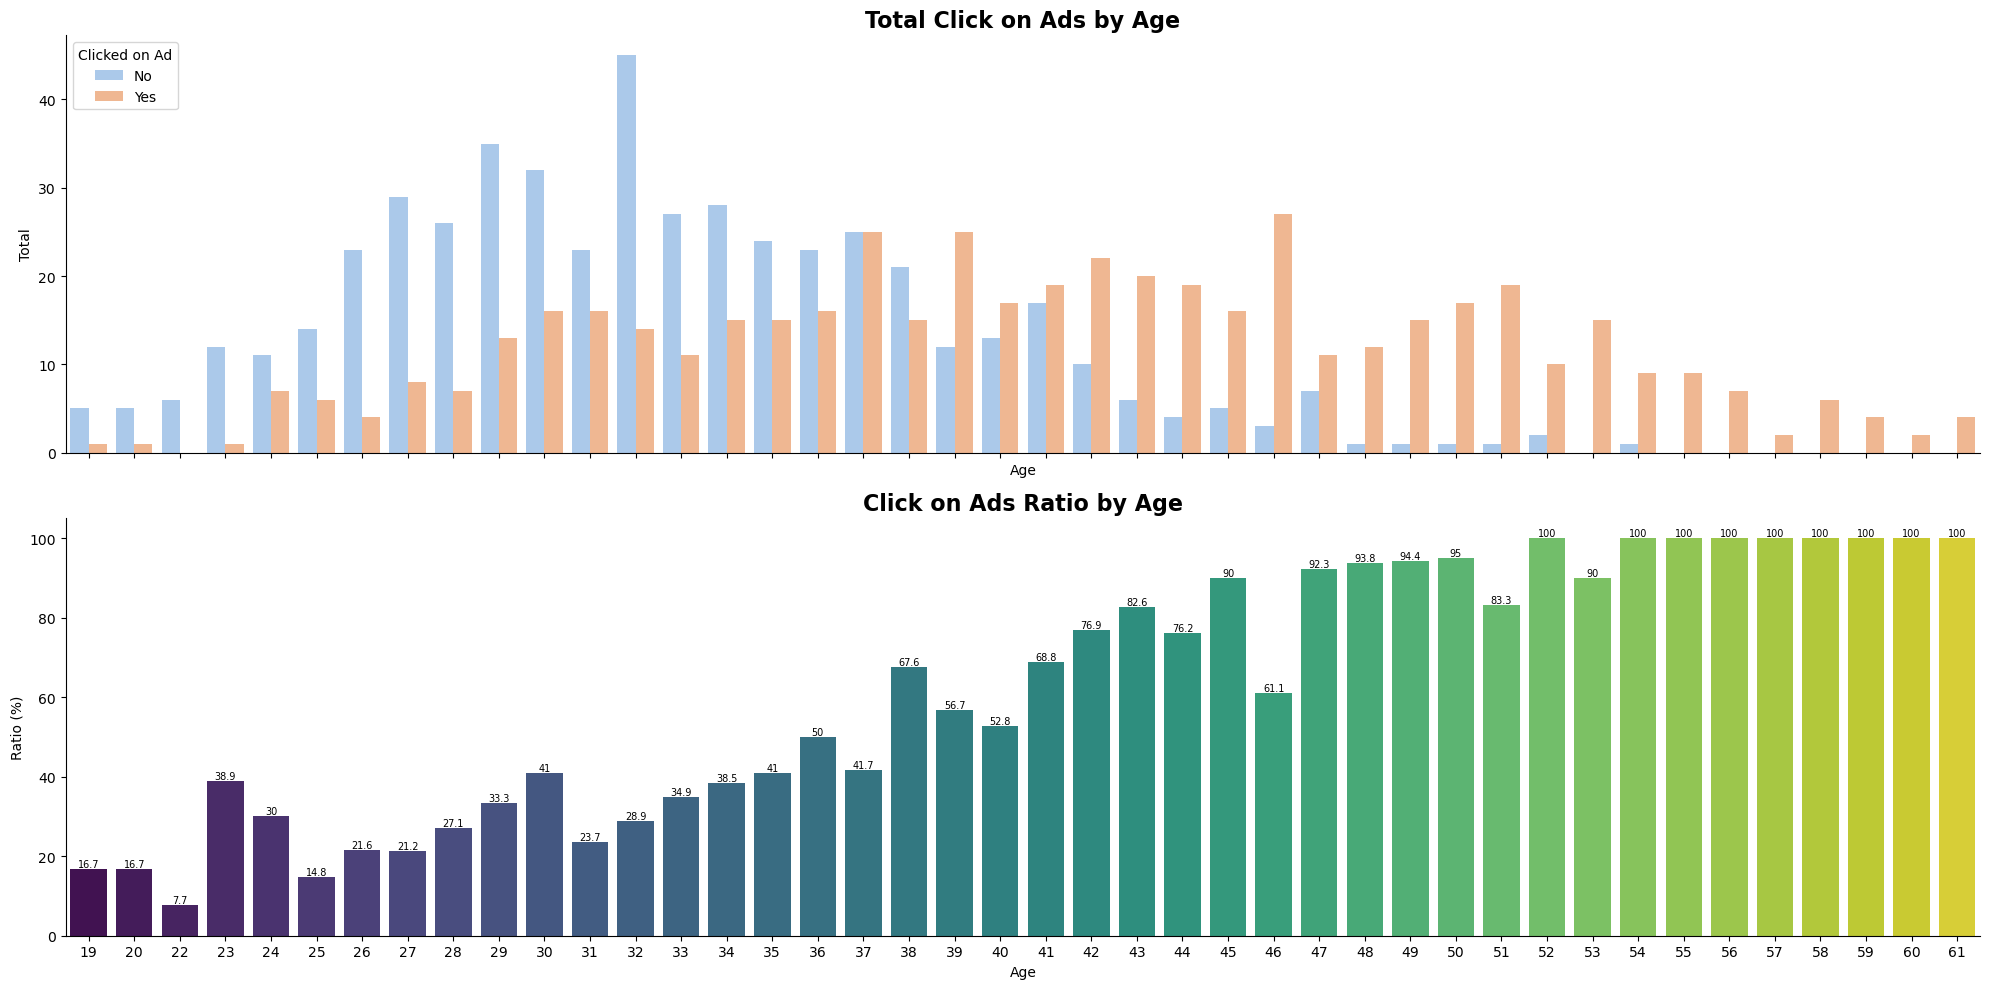

In [1105]:
#membuat table umur, click ads dan perbandingan cust yang klik ads
dfg = df.groupby(['Age','Clicked on Ad']).agg({'Male':'count'}).rename(columns={'Male':'Jumlah'}).reset_index()
dfg1 = df.groupby(['Age']).agg({'Male':'count'}).rename(columns={'Male':'Total'}).reset_index()
dfg = pd.merge(dfg, dfg1, on='Age', how='outer') #join untuk keperluan menghitung ratio
dfg['Ratio'] = dfg['Jumlah']/dfg['Total'] 
dfg['Ratio'] = round(dfg['Ratio'],3) * 100

#plot
fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,10), sharex=True) #mengatur dimensi plot
sns.barplot(ax=ax1, data=dfg, x='Age', y='Jumlah', hue='Clicked on Ad', palette='pastel')
sns.barplot(ax=ax2, data=dfg[dfg['Clicked on Ad']=='Yes'], x='Age', y='Ratio', palette='viridis')

#set title
ax1.set_title('Total Click on Ads by Age', weight='bold', size=16)
ax2.set_title('Click on Ads Ratio by Age', weight='bold', size=16)
ax1.set_ylabel('Total')
ax2.set_ylabel('Ratio (%)')
plt.bar_label(ax2.containers[0], size=7)
sns.despine()
plt.tight_layout()
plt.show()

### Time Spent on Site

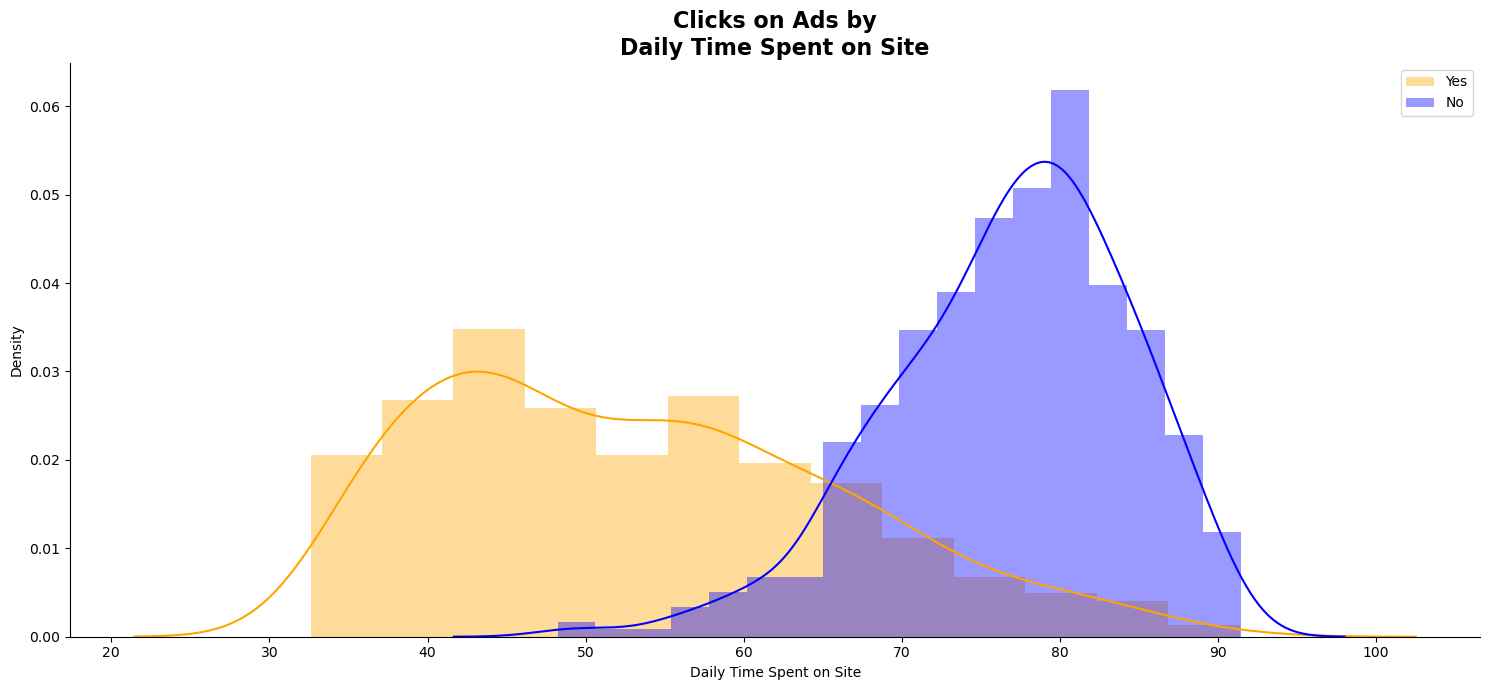

In [1106]:
yes_ads = df[df['Clicked on Ad'] == 'Yes']
no_ads = df[df['Clicked on Ad'] == 'No']

#plot
plt.figure(figsize=(15,7))
sns.distplot(yes_ads['Daily Time Spent on Site'], label= 'Yes', color='orange')
sns.distplot(no_ads['Daily Time Spent on Site'], label='No', color='blue')
plt.legend(loc='best')
plt.title('Clicks on Ads by\nDaily Time Spent on Site', weight='bold', size = 16)
sns.despine()
plt.tight_layout()
plt.show()

### Daily Internet Usage

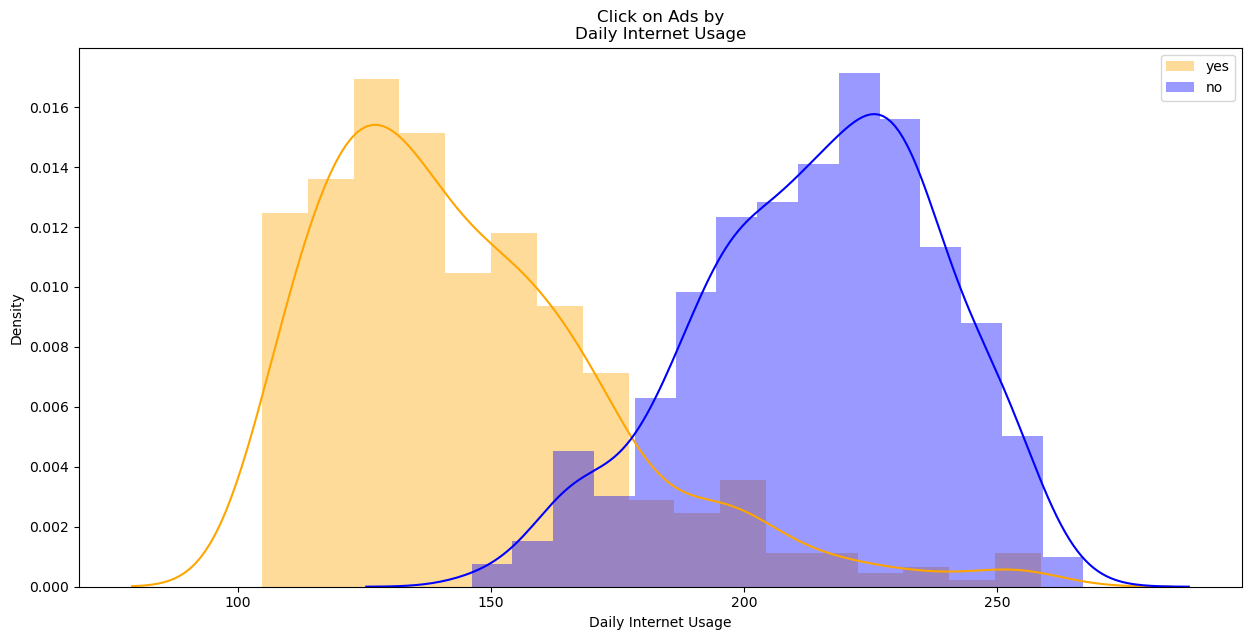

In [1107]:
#plot
plt.figure(figsize=(15,7))
sns.distplot(yes_ads['Daily Internet Usage'], label='yes', color='orange')
sns.distplot(no_ads['Daily Internet Usage'], label='no', color='blue')
plt.title('Click on Ads by\nDaily Internet Usage')
plt.legend(loc='best')


## Bivariate Analysis

## Multivariate Analysis

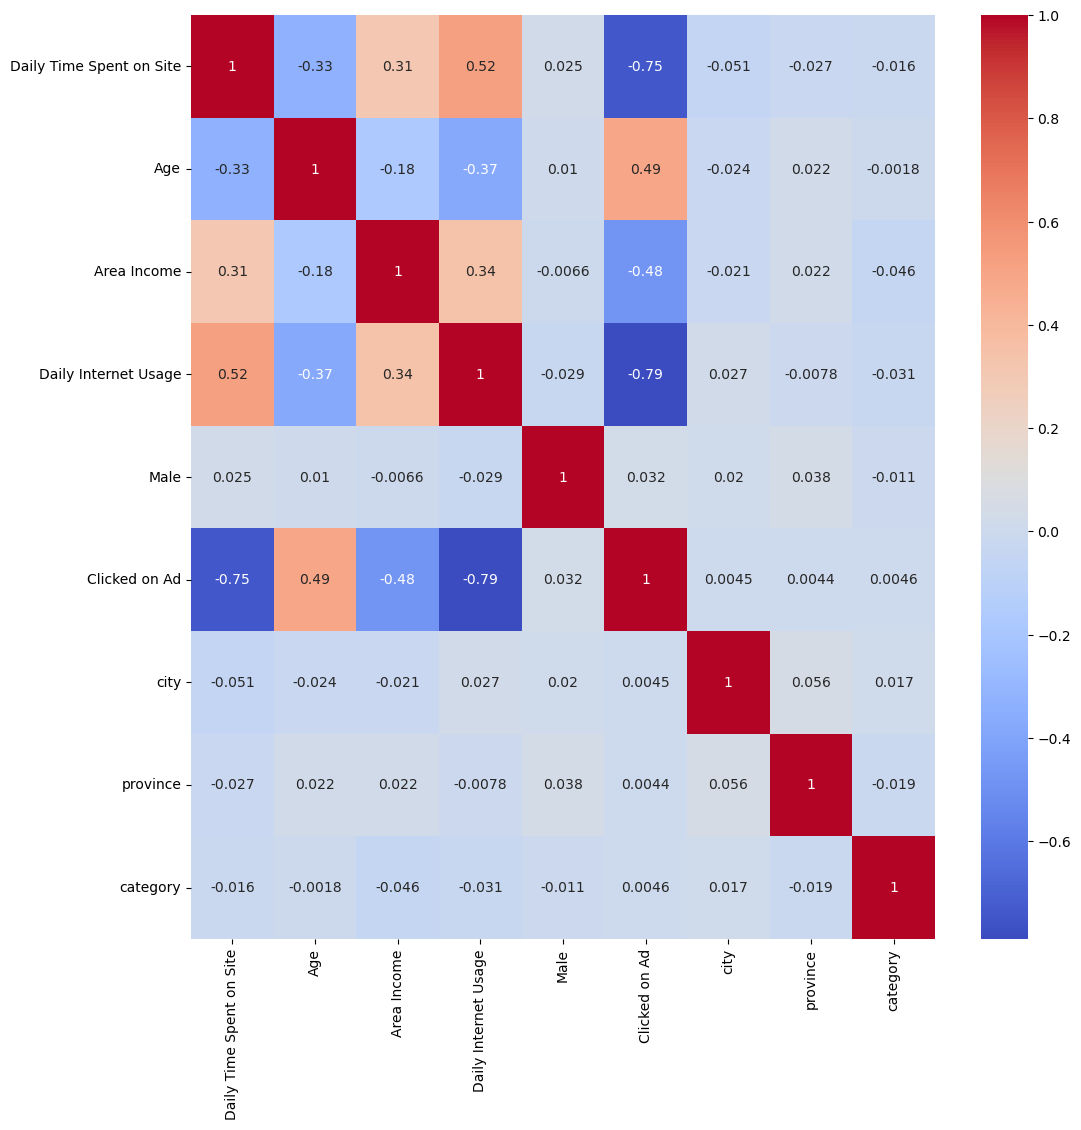

In [1108]:
from sklearn.preprocessing import LabelEncoder

#make function
def corr (data): #function for label encoding, mengubah type data object menjadi representasi numerical
    le = LabelEncoder()
    for i in data.columns:
        if data[i].dtype=='object':
            data[i] = le.fit_transform(data[i])
    
    corr_matrix = data.corr()
    return sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

#plot
plt.figure(figsize=(12,12))
df_corr = df.copy()
corr(df_corr)
plt.show()

# Pre-Processing

## Handling Missing Values

In [1109]:
#cek missing values
print('Terdapat missing value sebanyak :')
print(df.isna().sum())
print('dari total data sebanyak :', df.shape[0])

Terdapat missing value sebanyak :
Daily Time Spent on Site    13
Age                          0
Area Income                 13
Daily Internet Usage        11
Male                         3
Timestamp                    0
Clicked on Ad                0
city                         0
province                     0
category                     0
dtype: int64
dari total data sebanyak : 1000


In [1110]:
#fill missing values
df['Daily Time Spent on Site'] =  df['Daily Time Spent on Site'].fillna(df['Daily Time Spent on Site'].mean())
df['Area Income'] =  df['Area Income'].fillna(df['Area Income'].mean())
df['Daily Internet Usage'] =  df['Daily Internet Usage'].fillna(df['Daily Internet Usage'].mean())
df['Male'] = df['Male'].fillna(df['Male'].mode()[0])

## Handling Duplicates

In [1111]:
if df.duplicated().sum()==0: print('tidak ada data duplicate')
else: print('terdapat data duplicated sebanyak :', df.duplicated().sum())

tidak ada data duplicate


## Extract Feature Timestamp

In [1112]:
df['tahun'] = df['Timestamp'].apply(lambda x : x.year)
df['bulan'] = df['Timestamp'].apply(lambda x : x.month)
df['pekan'] = df['Timestamp'].apply(lambda x : x.week)
df['tanggal'] = df['Timestamp'].apply(lambda x : x.day)

## Feature Encoding

In [1113]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
dtype_object = ['Male', 'Clicked on Ad', 'city', 'province', 'category']

for i in dtype_object:
    df[i] = le.fit_transform(df[i])

## Split Feature and Target

In [1114]:
X = df.drop(columns=['Timestamp', 'tahun', 'Clicked on Ad']) #tahun hanya memiliki 1 value
y = df[['Clicked on Ad']]

# Modelling

## Split Data Test and Train

In [1115]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Standardization

In [1116]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
X_train_std = X_train.copy()

for i in X_train_std.columns:
    X_train_std[i] = ss.fit_transform(X_train_std[i].values.reshape(-1,1))

## Def Function

In [1117]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.ensemble import RandomForestClassifier

def eval_classification(model):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    y_pred_proba = model.predict_proba(X_test)
    y_pred_proba_train = model.predict_proba(X_train)
    
    print("Accuracy (Train Set): %.2f" % accuracy_score(y_train, y_pred_train))
    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred),"\n")

    print("Precision (Train Set): %.2f" % precision_score(y_train, y_pred_train))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred),"\n")

    print("Recall (Train Set): %.2f" % recall_score(y_train, y_pred_train))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred),"\n")

    print("F1-Score (Train Set): %.2f" % f1_score(y_train, y_pred_train))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred),"\n")
    
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]),"\n")
    
    score = cross_validate(RandomForestClassifier(), x, y, cv=5, scoring='precision', return_train_score=True)
    print('roc_auc (crossval train): '+ str(score['train_score'].mean()))
    print('roc_auc (crossval test): '+ str(score['test_score'].mean()),"\n")

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(15, 7))
    ax.invert_yaxis()

    plt.xlabel('Score', fontsize=16)
    plt.ylabel('Feature', fontsize=16)
    plt.title('Feature Importance Score', fontsize=16)

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

## Logistic Regression

### Data Train Normal

In [1118]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train) #fit ke data normal, tanpa standardisasi
eval_classification(lr)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.73 



roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9657049206436714 



### Data Train Standardisasi

In [1119]:
from sklearn.linear_model import LogisticRegression

lr_std = LogisticRegression(random_state=42)
lr_std.fit(X_train_std, y_train) #fit ke data normal, tanpa standardisasi
eval_classification(lr_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9736730188482765 



### Hyperparameter Tuning - LogReg

#### Data Train Normal

In [1120]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
c = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=c)

rs_lr = RandomizedSearchCV(lr, hyperparameters, scoring='accuracy', random_state=42, cv=5, n_iter=100)
rs_lr.fit(X_train, y_train)
eval_classification(rs_lr)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.73 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.959983282884389 



#### Data Train Standardisasi

In [1121]:
from sklearn.model_selection import RandomizedSearchCV

penalty = ['l1', 'l2']
c = [float(x) for x in np.linspace(0.0001, 0.05, 100)]
hyperparameters = dict(penalty=penalty, C=c)

rs_lr_std = RandomizedSearchCV(lr_std, hyperparameters, scoring='accuracy', random_state=42, cv=5, n_iter=100)
rs_lr_std.fit(X_train_std, y_train)
eval_classification(rs_lr_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9620134813639968 



## KNN

### Data Train Normal

In [1122]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
eval_classification(knn)

Accuracy (Train Set): 0.78
Accuracy (Test Set): 0.68 

Precision (Train Set): 0.79
Precision (Test Set): 0.71 

Recall (Train Set): 0.75
Recall (Test Set): 0.64 

F1-Score (Train Set): 0.77
F1-Score (Test Set): 0.67 

roc_auc (train-proba): 0.86
roc_auc (test-proba): 0.70 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9674543817527012 



### Data Train Standardisasi

In [1123]:
from sklearn.neighbors import KNeighborsClassifier

knn_std = KNeighborsClassifier()
knn_std.fit(X_train_std, y_train)
eval_classification(knn_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9638080304286664 



### Hyperparameter Tuning - KNN

#### Data Train Normal

In [1124]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,50))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

rs_knn = RandomizedSearchCV(knn, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rs_knn.fit(X_train, y_train)
eval_classification(rs_knn)

Accuracy (Train Set): 0.73
Accuracy (Test Set): 0.68 

Precision (Train Set): 0.77
Precision (Test Set): 0.75 

Recall (Train Set): 0.65
Recall (Test Set): 0.57 

F1-Score (Train Set): 0.71
F1-Score (Test Set): 0.65 

roc_auc (train-proba): 0.79
roc_auc (test-proba): 0.72 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9638163430420711 



#### Data Train Standardisasi

In [1125]:
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(1,50))
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

rs_knn_std = RandomizedSearchCV(knn_std, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rs_knn_std.fit(X_train_std, y_train)
eval_classification(rs_knn_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9693641782861224 



## Decision Tree

### Data Train Normal

In [1126]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
eval_classification(dt)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.92 

Precision (Train Set): 1.00
Precision (Test Set): 0.93 

Recall (Train Set): 1.00
Recall (Test Set): 0.92 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.92 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.92 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9636392666820051 



### Data Train Standardisasi

In [1127]:
from sklearn.tree import DecisionTreeClassifier
dt_std = DecisionTreeClassifier(random_state=42)
dt_std.fit(X_train_std, y_train)
eval_classification(dt_std)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.51 

Precision (Train Set): 0.49
Precision (Test Set): 0.51 

Recall (Train Set): 1.00
Recall (Test Set): 1.00 

F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9617395017002472 



### Hyperparameter Tuning - DT

#### Data Train Normal

In [1128]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int (x) for x in np.linspace(1, 110, 30)] #range 1 - 100 dengan interval per 30
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf,
                       max_features = max_features,
                       criterion = criterion,
                       splitter = splitter)

rs_dt = RandomizedSearchCV(dt, hyperparameters, cv=5, scoring='accuracy', random_state=42)
rs_dt.fit(X_train, y_train)
eval_classification(rs_dt) 

Accuracy (Train Set): 0.95
Accuracy (Test Set): 0.90 

Precision (Train Set): 0.96
Precision (Test Set): 0.89 

Recall (Train Set): 0.94
Recall (Test Set): 0.92 

F1-Score (Train Set): 0.95
F1-Score (Test Set): 0.90 

roc_auc (train-proba): 0.99
roc_auc (test-proba): 0.93 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9583282105286784 



#### Data Train Standardisasi

In [1129]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int (x) for x in np.linspace(1, 110, 30)] #range 1 - 100 dengan interval per 30
min_samples_split = [2, 5, 10, 100]
min_samples_leaf = [1, 2, 4, 10, 20, 50]
max_features = ['auto', 'sqrt']
criterion = ['gini', 'entropy']
splitter = ['best', 'random']

hyperparameters = dict(max_depth = max_depth,
                       min_samples_split = min_samples_split,
                       min_samples_leaf = min_samples_leaf,
                       max_features = max_features,
                       criterion = criterion,
                       splitter = splitter)

rs_dt_std = RandomizedSearchCV(dt_std, hyperparameters, cv=5, scoring='accuracy', random_state=42)
rs_dt_std.fit(X_train_std, y_train)
eval_classification(rs_dt_std) 

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.50
roc_auc (test-proba): 0.50 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9637660586835844 



## Random Forest

### Data Train Normal

In [1130]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
eval_classification(rf)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.96 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 1.00
Recall (Test Set): 0.96 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.96 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.96172256123069 



### Data Train Standardisasi

In [1131]:
from sklearn.ensemble import RandomForestClassifier

rf_std = RandomForestClassifier(random_state=42)
rf_std.fit(X_train_std, y_train)
eval_classification(rf_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.53
roc_auc (test-proba): 0.47 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.965691605778534 



### Hyperparameter Tuning - RF

#### Data Train Normal

In [1132]:
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
criterion = ['gini', 'entropy']
hyperparameters = dict(n_estimators=n_estimators, 
                       criterion=criterion, 
                       max_depth=max_depth,
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf)

rs_rf = RandomizedSearchCV(rf, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rs_rf.fit(X_train, y_train)
eval_classification(rs_rf)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95 

Precision (Train Set): 0.99
Precision (Test Set): 0.95 

Recall (Train Set): 0.98
Recall (Test Set): 0.96 

F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9620964351852817 



#### Data Train Standardisasi

In [1133]:
n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
criterion = ['gini', 'entropy']
hyperparameters = dict(n_estimators=n_estimators, 
                       criterion=criterion, 
                       max_depth=max_depth,
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf)

rs_rf_std = RandomizedSearchCV(rf_std, hyperparameters, scoring='accuracy', random_state=42, cv=5)
rs_rf_std.fit(X_train_std, y_train)
eval_classification(rs_rf_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.55
roc_auc (test-proba): 0.52 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.96740505735825 



## AdaBoost

### Data Train Normal

In [1134]:
from sklearn.ensemble import AdaBoostClassifier

adb = AdaBoostClassifier(random_state=42)
adb.fit(X_train, y_train)
eval_classification(adb)

Accuracy (Train Set): 0.99
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.96 

Recall (Train Set): 0.98
Recall (Test Set): 0.95 

F1-Score (Train Set): 0.99
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9620395412147988 



### Data Train Standardisasi

In [1135]:
from sklearn.ensemble import AdaBoostClassifier

adb_std = AdaBoostClassifier(random_state=42)
adb_std.fit(X_train_std, y_train)
eval_classification(adb_std)

Accuracy (Train Set): 0.49
Accuracy (Test Set): 0.51 

Precision (Train Set): 0.49
Precision (Test Set): 0.51 

Recall (Train Set): 1.00
Recall (Test Set): 1.00 

F1-Score (Train Set): 0.66
F1-Score (Test Set): 0.68 

roc_auc (train-proba): 0.49
roc_auc (test-proba): 0.48 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9656160883385029 



### Hyperparameter Tuning - ADB

#### Data Train Normal

In [1136]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(50, 2000, 2000)]
learning_rate = [float(x) for x in np.linspace(0.001, 0.1, 200)]
algorithm = ['SAMME', 'SAMME.R']

hyperparameters = dict(n_estimators=n_estimators,
                       learning_rate=learning_rate,  
                       algorithm=algorithm)

rs_adb = RandomizedSearchCV(adb, hyperparameters, cv=5, scoring='accuracy', random_state=42)
rs_adb.fit(X_train, y_train)

# Predict & Evaluation
eval_classification(rs_adb)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 0.96
Recall (Test Set): 0.95 

F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.99 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9658480770579446 



#### Data Train Standardisasi

In [1137]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(50, 2000, 2000)]
learning_rate = [float(x) for x in np.linspace(0.001, 0.1, 200)]
algorithm = ['SAMME', 'SAMME.R']

hyperparameters = dict(n_estimators=n_estimators,
                       learning_rate=learning_rate,  
                       algorithm=algorithm)

rs_adb_std = RandomizedSearchCV(adb_std, hyperparameters, cv=5, scoring='accuracy', random_state=42)
rs_adb_std.fit(X_train_std, y_train)

# Predict & Evaluation
eval_classification(rs_adb_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.49
roc_auc (test-proba): 0.48 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9653753136681102 



## XGBoost

### Data Train Normal

In [1138]:
from xgboost import XGBClassifier

xgb = XGBClassifier(random_state=42)
xgb.fit(X_train, y_train)
eval_classification(xgb)

Accuracy (Train Set): 1.00
Accuracy (Test Set): 0.95 

Precision (Train Set): 1.00
Precision (Test Set): 0.95 

Recall (Train Set): 1.00
Recall (Test Set): 0.94 

F1-Score (Train Set): 1.00
F1-Score (Test Set): 0.95 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9640049091801668 



### Data Train Standardisasi

In [1139]:
from xgboost import XGBClassifier

xgb_std = XGBClassifier(random_state=42)
xgb_std.fit(X_train_std, y_train)
eval_classification(xgb_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.51
roc_auc (test-proba): 0.49 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9638393200344957 



### Hyperparameter Tuning - XGB

#### Data Train Normal

In [1140]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int(x) for x in np.linspace(10, 110, 11)]
min_child_weight = [int(x) for x in np.linspace(1, 20, 10)]
gamma = [float(x) for x in np.linspace(0, 1, 10)]
tree_method = ['auto', 'exact', 'approx', 'hist']
colsample_bytree = [float(x) for x in np.linspace(0, 1, 10)]
eta = [float(x) for x in np.linspace(0, 1, 100)]
alpha = [float(x) for x in np.linspace(0, 1, 10)]

hyperparameters = dict(max_depth=max_depth,
                       min_child_weight=min_child_weight,
                       gamma=gamma,
                       tree_method=tree_method,
                       colsample_bytree=colsample_bytree,
                       eta=eta,
                       alpha=alpha)

rs_xgb = RandomizedSearchCV(xgb, hyperparameters, cv=5, scoring='accuracy', random_state=42)
rs_xgb.fit(X_train, y_train)

eval_classification(rs_xgb)

Accuracy (Train Set): 0.98
Accuracy (Test Set): 0.94 

Precision (Train Set): 0.99
Precision (Test Set): 0.95 

Recall (Train Set): 0.97
Recall (Test Set): 0.94 

F1-Score (Train Set): 0.98
F1-Score (Test Set): 0.94 

roc_auc (train-proba): 1.00
roc_auc (test-proba): 0.98 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9618293855053505 



#### Data Train Standardisasi

In [1141]:
from sklearn.model_selection import RandomizedSearchCV

max_depth = [int(x) for x in np.linspace(10, 110, 11)]
min_child_weight = [int(x) for x in np.linspace(1, 20, 10)]
gamma = [float(x) for x in np.linspace(0, 1, 10)]
tree_method = ['auto', 'exact', 'approx', 'hist']
colsample_bytree = [float(x) for x in np.linspace(0, 1, 10)]
eta = [float(x) for x in np.linspace(0, 1, 100)]
alpha = [float(x) for x in np.linspace(0, 1, 10)]

hyperparameters = dict(max_depth=max_depth,
                       min_child_weight=min_child_weight,
                       gamma=gamma,
                       tree_method=tree_method,
                       colsample_bytree=colsample_bytree,
                       eta=eta,
                       alpha=alpha)

rs_xgb_std = RandomizedSearchCV(xgb_std, hyperparameters, cv=5, scoring='accuracy', random_state=42)
rs_xgb_std.fit(X_train_std, y_train)

eval_classification(rs_xgb_std)

Accuracy (Train Set): 0.51
Accuracy (Test Set): 0.49 

Precision (Train Set): 0.00
Precision (Test Set): 0.00 

Recall (Train Set): 0.00
Recall (Test Set): 0.00 

F1-Score (Train Set): 0.00
F1-Score (Test Set): 0.00 

roc_auc (train-proba): 0.53
roc_auc (test-proba): 0.52 

roc_auc (crossval train): 1.0
roc_auc (crossval test): 0.9601894143419101 



# Evaluation

## Feature Importance

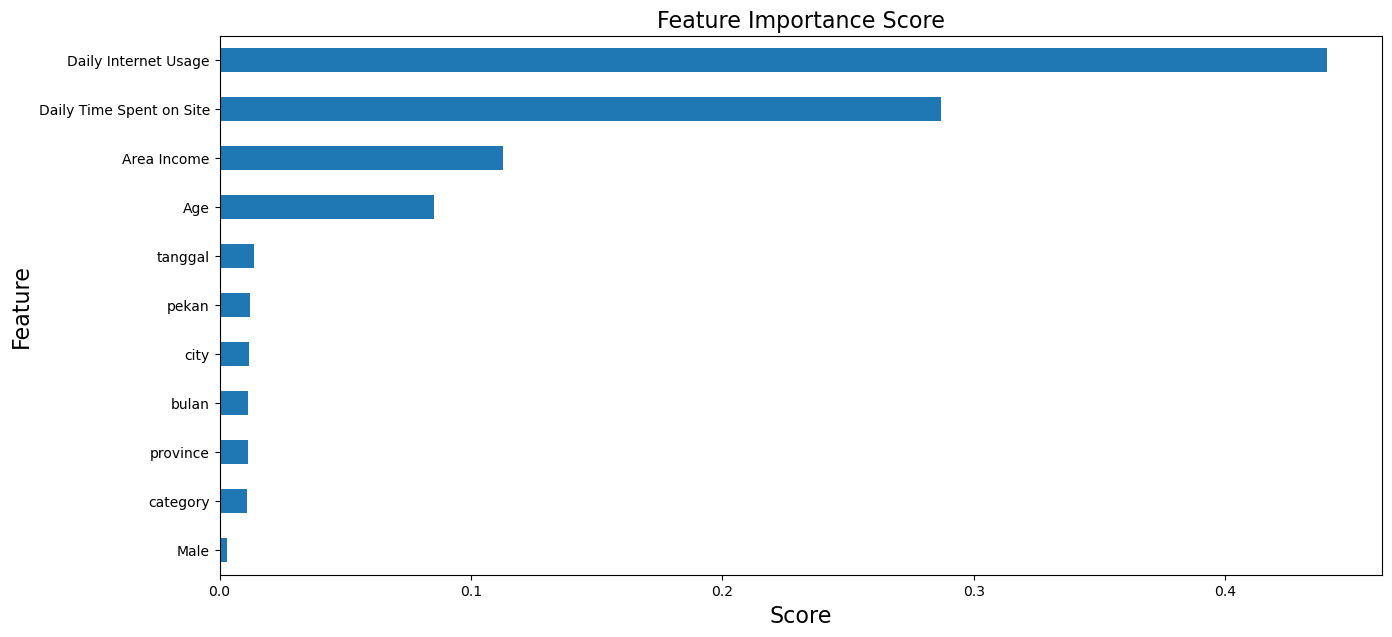

In [1142]:
# Cek Features Importance
show_feature_importance(rf) #menggunakan Random Forest dengan Data Train Normal karena memiliki nilai evaluasi score terbaik

## Analyze Performance

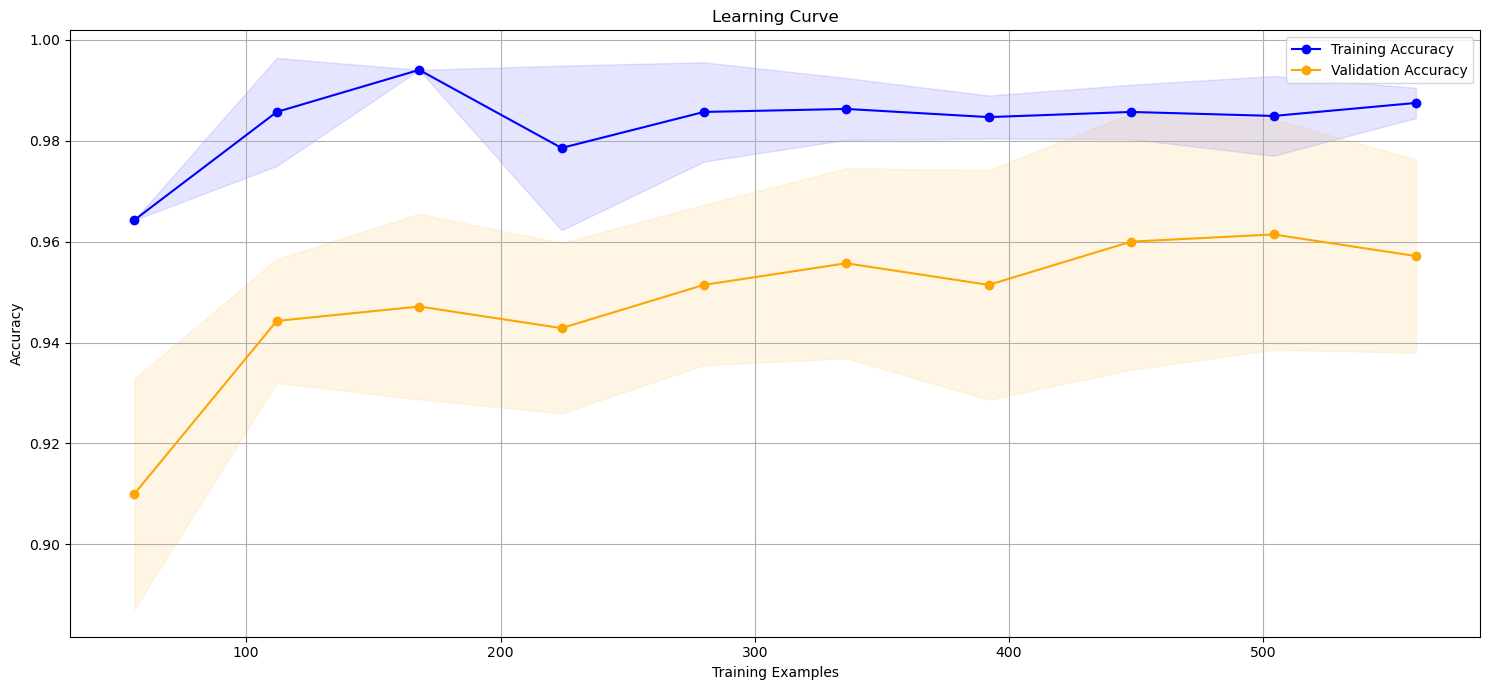

In [1143]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, X, y):
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=5, train_sizes=np.linspace(0.1, 1, 10))

    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.figure(figsize=(15,7))
    plt.plot(train_sizes, train_mean, 'o-', label='Training Accuracy', color='blue') #'o-' memberi dot pada plots
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color='blue') #untuk melihat jarak std terhadap mean pada plot
    plt.plot(train_sizes, test_mean, 'o-', label='Validation Accuracy', color='orange')
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color='orange')

    plt.title('Learning Curve')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')

    plt.grid() #memberi grid pada grafik
    plt.tight_layout()
    plt.legend(loc='best')
    plt.show()

plot_learning_curve(rs_rf, X_train, y_train)

## Confusion Matrix

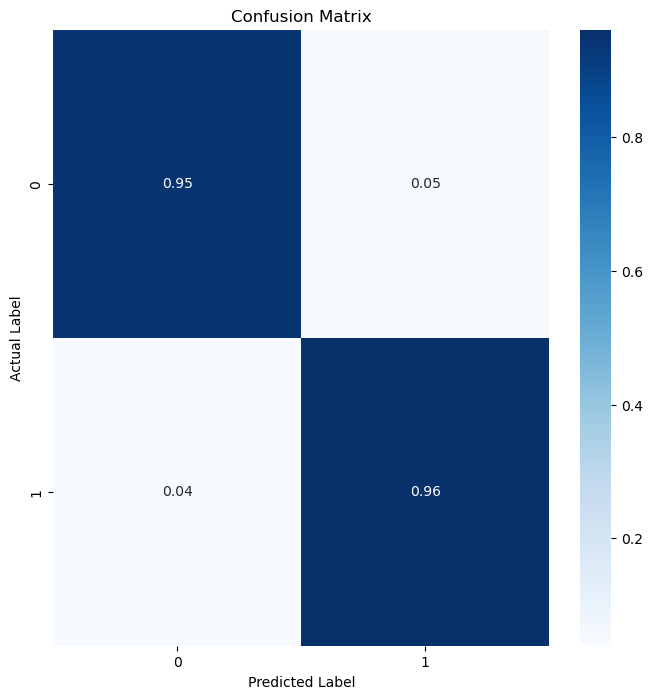

In [1144]:
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes): #y_true = actual event, y_pred = prediction event
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #normalize (make value of matrix to : 0 - 1)

    plt.figure(figsize=(8,8))
    sns.heatmap(cm, annot=True, cmap='Blues', fmt='.2f', xticklabels=classes, yticklabels=classes)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted Label')
    plt.ylabel('Actual Label')
    plt.show()

y_pred = rs_rf.predict(X_test)
plot_confusion_matrix(y_test, y_pred, ['0', '1'])